In [1]:
#import
import numpy as np
import os, zipfile, shutil,gzip
import pandas as pd
import glob
import os
from datetime import datetime
from datetime import timedelta
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sys
import copy
import warnings
import scipy
from numpy import polyfit, poly1d
import tarfile
import math
import time
from scipy import interpolate
import matplotlib as mpl
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from collections import Counter
import collections
import plotly.graph_objects as go
import plotly
import pyarrow as pa
import pyarrow.parquet as pq
import json
import Hawkes as hk
if not sys.warnoptions:
    warnings.simplefilter("ignore")

C:\Users\杜威\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\杜威\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 利润分析

##  设置平衡仓位和时间区间并保存

In [2]:
def save_dic(name, dic):
    file = open(f'C:/Users/杜威/Desktop/tardis/Tom_data/params/{name}.txt', 'w')
    data_str = str(dic)
    file.write(data_str)
    file.close()
    
def read_dic(name):
    file = open(f'C:/Users/杜威/Desktop/tardis/Tom_data/params/{name}.txt', 'r')
    content = file.read()
    dictionary = eval(content)
    file.close()
    return dictionary

time_list = {
    '1':['2023-04-04 00:00:00', '2023-05-15 02:55:23'],
    '2':['2023-05-15 13:00:00', '2023-08-30 10:10:52'],
    '3':['2023-08-30 15:00:00', '2023-10-07 23:59:59'],
    '4':['2023-10-10 00:00:00', '2023-10-24 19:45:00'],
    '5':['2023-10-25 00:00:00', '2023-10-31 00:00:00'],
    '6':['2023-10-31 00:00:00', '2023-11-15 10:00:00'],
    '7':['2023-11-14 23:00:00', '2023-12-15 12:00:00']
}
save_dic('time', time_list)

balance_map = {
    '1':{
        'kraken_formal':{
            'aud':38069,
            'btc':18,
            'cad':178185,
            'chf':109190,
            'dai':34338,
            'dot':13155,
            'eth':196,
            'eur':555823,
            'gbp':169334,
            'matic':97425,
            'paxg':16,
            'sol':7022,
            'usd':750000,
            'usdc':149067,
            'usdt':348652
        },
        'kraken_test':{
            'aud':38069,
            'btc':18,
            'cad':178185,
            'chf':109190,
            'dai':34338,
            'dot':13155,
            'eth':196,
            'eur':555823,
            'gbp':169334,
            'matic':97425,
            'paxg':16,
            'sol':7022,
            'usd':750000,
            'usdc':149067,
            'usdt':348652
        }
    },
    '2':{
        'kraken_formal':{
            'aud':20824,
            'btc':11,
            'cad':141123,
            'chf':37783,
            'dai':2947,
            'dot':7678,
            'eth':195,
            'eur':311350,
            'gbp':226798,
            'matic':61620,
            'paxg':2,
            'sol':4494,
            'usd':629776,
            'usdc':47912,
            'usdt':226984
        },
        'kraken_test':{
            'aud':20824,
            'btc':11,
            'cad':141123,
            'chf':37783,
            'dai':2947,
            'dot':7678,
            'eth':195,
            'eur':311350,
            'gbp':226798,
            'matic':61620,
            'paxg':2,
            'sol':4494,
            'usd':629776,
            'usdc':47912,
            'usdt':226984
        }
    },
    '3':{
        'kraken_test':{
            'aud':20824.18,
            'btc':10.99,
            'cad':141122.87,
            'chf':37783.15,
            'dai':1,
            'dot':7678.18,
            'eth':194.66,
            'eur':311350.15,
            'gbp':226797.59,
            'matic':61619.55,
            'paxg':5,
            'sol':4493.56,
            'usd':629776,
            'usdc':47912,
            'usdt':226984,
            'xdg':763359,
            'ltc':884,
            'xrp':93668,
            'ada':168602,
            'link':4934
        },
        'kraken_formal':{
            'usdt':246984,
            'usdc':60000,
            'usd':550000,
            'dai':1,
            'eur':321987,
            'chf':87877,
            'gbp':223618,
            'cad':108517,
            'aud':92720,
            'paxg':5,
            'btc':11,
            'eth':175,
            'sol':4413,
            'dot':8652,
            'matic':85441,
            'xdg':916031,
            'ltc':884,
            'xrp':93668,
            'ada':168602,
            'link':4934
        }
    },
    '4':{
        'kraken_formal':{
            'usdt':825000,
            'usdc':160000,
            'usd':1652000,
            'dai':1,
            'eur':482981,
            'chf':131815,
            'gbp':335427,
            'cad':162776,
            'aud':139080,
            'paxg':8,
            'btc':16,
            'eth':262,
            'sol':6619,
            'dot':12979,
            'matic':128161,
            'xdg':1374046,
            'ltc':1326,
            'xrp':140502,
            'ada':252904,
            'link':7401
        }
    },
    '5':{
        'kraken_formal':{
            'usdt':260000,
            'usdc':50000,
            'usd':1437591,
            'dai':1,
            'eur':497085,
            'chf':74842,
            'gbp':122623,
            'cad':109552,
            'aud':88677,
            'paxg':5,
            'btc':23,
            'eth':273,
            'sol':6383,
            'dot':7394,
            'matic':76840,
            'xdg':1038576,
            'ltc':2396,
            'xrp':254037,
            'ada':492438,
            'link':4626
        }
    },
    '6':{
        'kraken_formal':{
            'usdt':260000,
            'usdc':50000,
            'usd':1437591,
            'dai':1,
            'eur':497085,
            'chf':112262,
            'gbp':122623,
            'cad':76686,
            'aud':88677,
            'paxg':5,
            'btc':23,
            'eth':273,
            'sol':8297,
            'dot':11091,
            'matic':76840,
            'xdg':1350148,
            'ltc':2396,
            'xrp':254037,
            'ada':492438,
            'link':6939
        },
    },
     '7':{
        'kraken_formal':{
            'usdt':250000,
            'usdc':50000,
            'usd':1000000,
            'dai':1,
            'eur':374883,
            'chf':90500,
            'gbp':81967,
            'cad':41082,
            'aud':88677,
            'paxg':5,
            'btc':9,
            'eth':122,
            'sol':8772,
            'dot':11091,
            'matic':74860,
            'xdg':1350148,
            'ltc':1344,
            'xrp':75919,
            'ada':396825,
            'link':9615     
        }
     }
}
save_dic('balance', balance_map)

credit_map = {
    '7':{
        'kraken_formal':{
            'usdt':250000,
            'usdc':50000,
            'usd':1000000,
            'dai':0,
            'eur':374883,
            'chf':0,
            'gbp':163934,
            'cad':68470,
            'aud':0,
            'paxg':0,
            'btc':19,
            'eth':244,
            'sol':8772,
            'dot':0,
            'matic':74860,
            'xdg':0,
            'ltc':0,
            'xrp':151837,
            'ada':264550,
            'link':0     
        }
     }
}
save_dic('credit', credit_map)

## 计算仓位，贴取fp，计算收益

In [3]:
#获取不含fp的仓位变动
def get_ledger(ex, ls):
    df = []
    if ls == 'all':
        for file in os.listdir(f'C:/Users/杜威/Desktop/tardis/Tom_data/ledgers/{ex}'):
            df0 = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/Tom_data/ledgers/{ex}/{file}')
            df.append(df0)
    else:
        for num in ls:
            df0 = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/Tom_data/ledgers/{ex}/ledgers{num}.csv')
            df.append(df0)
    df = pd.concat(df)
    df['time'] = pd.to_datetime(df['time'])
    df['time']=df['time']+timedelta(hours=8)#使用+8时间
    df = df.sort_values(by='time').reset_index()
    df['amount'] -= df['fee']
    df = df[['time','type','asset','amount','balance']]
    recite = lambda x: x.replace('Z', '').replace('XETH', 'ETH').replace('XXBT', 'XBT').replace('XBT', 'BTC').replace('XXRP','XRP').replace('XLTC','LTC').replace('XXDG','XDG').lower()
    df['asset'] = df['asset'].map(recite)
    df.loc[df['type'] == 'credit', 'amount'] *= -1
    df.loc[df['type'] == 'credit', 'balance'] *= -1
    return df.drop_duplicates().dropna()

def get_trade(ex, ls):
    df = []
    if ls == 'all':
        for file in os.listdir(f'C:/Users/杜威/Desktop/tardis/Tom_data/trade/{ex}'):
            df0 = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/Tom_data/trade/{ex}/{file}')
            df.append(df0)
    else:
        for num in ls:
            df0 = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/Tom_data/trade/{ex}/trades{num}.csv')
            df.append(df0)
    df = pd.concat(df)
    df = df.drop_duplicates()
    df['time'] = pd.to_datetime(df['time'])
    df['time']=df['time']+timedelta(hours=8)#使用+8时间
    df = df.sort_values(by='time').reset_index()
    df = df[['time','pair','type','price','vol','cost']]
    recite = lambda x: x.replace('Z', '').replace('XETH', 'ETH').replace('XXBT', 'XBT').replace('XBT', 'BTC').replace('XXRP','XRP').replace('XLTC','LTC').replace('XXDG','XDG').lower()
    df['pair'] = df['pair'].map(recite)
    df.rename(columns={'vol': 'amount', 'cost': 'value'}, inplace=True)
    df = df.groupby(['time','pair','type','price'], as_index = False).sum()
    return df.drop_duplicates()

def fix_num(trade):
    tick = 0.000000000001
    for coin in ['eur','aud','cad','gbp','chf','usd']:
        trade.loc[trade['buy_coin'] == coin,'buy_amount'] = trade.loc[trade['buy_coin'] == coin,'buy_amount'].map(lambda x:round(x + tick,4))
        trade.loc[trade['sell_coin'] == coin,'sell_amount'] = trade.loc[trade['sell_coin'] == coin,'sell_amount'].map(lambda x:round(x + tick,4))
    return trade

def get_begin(trade, ledger, begin):
    trade = trade[trade['time'] >= begin].iloc[:10000,]
    ledger = ledger[ledger['time'] >= begin]
    trade['buy_coin'] = trade.apply(lambda row: row['pair'][-4:] if row['pair'][-4:] in ['usdt','usdc'] and row['type'] == 'sell' 
                            else row['pair'][:-4] if row['pair'][-4:] in ['usdt','usdc'] and row['type'] == 'buy' 
                            else row['pair'][:-3] if row['type'] == 'buy'
                            else row['pair'][-3:],axis=1)
    trade['sell_coin'] = trade.apply(lambda row: row['pair'][-4:] if row['pair'][-4:] in ['usdt','usdc'] and row['type'] == 'buy' 
                            else row['pair'][:-4] if row['pair'][-4:] in ['usdt','usdc'] and row['type'] == 'sell' 
                            else row['pair'][:-3] if row['type'] == 'sell'
                            else row['pair'][-3:],axis=1)
    trade['buy_amount'] = trade.apply(lambda row: row['amount'] if row['type'] == 'buy' else row['value'],axis=1)
    trade['sell_amount'] = trade.apply(lambda row: row['amount'] if row['type'] == 'sell' else row['value'],axis=1)
    trade = trade.groupby(['buy_coin','sell_coin'], as_index = False).first().sort_values(by = 'time')
    trade['time_m'] = trade['time'].dt.floor('s')
    trade = fix_num(trade)
    pos = {}
    for raw in trade.values:
        coin1 = raw[0]
        coin2 = raw[1]
        buy_amount = raw[8]
        sell_amount = raw[9]
        if coin1 in pos and coin2 in pos:
            continue
        if coin1 not in pos:
            pos[coin1] = ledger[(ledger['time'] == raw[10]) & (ledger['asset'] == coin1) & (ledger['amount'] == buy_amount)]['balance'].values[0] - buy_amount
        if coin2 not in pos:
            pos[coin2] = ledger[(ledger['time'] == raw[10]) & (ledger['asset'] == coin2) & (ledger['amount'] == -1*sell_amount)]['balance'].values[0] + sell_amount
    if 'doge' in pos.keys():
        pos['xdg'] = pos['doge']
    for coin in set(ledger.asset):
        if coin not in pos.keys():
            pos[coin] = 0
    return pos

def merge_ledger_trade(df, dt, begin_time, end_time):
    other = df[df['type'] != 'trade'][(df['type'] != 'credit')]
    other.rename(columns = {'asset':'pair'}, inplace = True)
    other = other[['time', 'type', 'pair', 'amount']]
    dt = pd.concat([dt, other]).sort_values('time').reset_index()
    del dt['index']
    return dt[dt['time'] >= begin_time][dt['time'] <= end_time]

def get_allpos(df,begin_pos):
    begin = copy.deepcopy(begin_pos)
    arr = df.to_numpy()
    trade_records = np.empty((len(arr), 9), dtype=object)
    for i in range(0, len(arr)):
        side = arr[i][2]
        price = arr[i][3]
        ch1,ch2 = arr[i][4],arr[i][5]
        if side in ['buy', 'sell']:
            if arr[i][1][-4:] in ['usdt','usdc']:
                coin1,coin2 = arr[i][1][:-4],arr[i][1][-4:]
            else:
                coin1,coin2 = arr[i][1][:-3],arr[i][1][-3:]
            if side == 'buy':
                ch2 *= -1
            else:
                ch1 *= -1
            
            begin1, begin2 = begin[coin1], begin[coin2]
            begin[coin1] += ch1
            begin[coin2] += ch2
        else:
            coin1, coin2 = arr[i][1], np.nan
            begin1, begin2 = begin[coin1], np.nan
            begin[coin1] += ch1
        
        if i == 152876:
            print(1)
            #begin1 = 0
            #begin[coin1] = ch1
        trade_record = np.array([arr[i][0], coin1, coin2, side, price, ch1, ch2, begin1, begin2])
        trade_records[i] = trade_record

    columns = ['time', 'coin1', 'coin2', 'side', 'price', 'ch1', 'ch2', 'begin1', 'begin2']
    trade_records_df = pd.DataFrame(trade_records, columns=columns)
    return trade_records_df

def get_allinfo_nofp(ex, begin_time, end_time, name):
    df = get_ledger(ex, 'all')
    dt = get_trade(ex, 'all')
    begin_pos = get_begin(dt, df, begin_time)
    dt0 = merge_ledger_trade(df, dt, begin_time, end_time)
    dt0 = get_allpos(dt0, begin_pos)
    dt0.to_csv(f'C:/Users/杜威/Desktop/tardis/profit/plot/pos/{ex}/{name}.csv')
    return dt0

In [6]:
def get_fp(ls):
    fp = []
    if ls == 'all':
        ls = os.listdir(f'C:/Users/杜威/Desktop/tardis/profit/final_df')
    for coin_part in ls:
        for file in os.listdir(f'C:/Users/杜威/Desktop/tardis/profit/final_df/{coin_part}'):
            fp0 = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/profit/final_df/{coin_part}/{file}')
            fp.append(fp0)
    fp = pd.concat(fp)
    fp['time'] = pd.to_datetime(fp['time'])
    fp = fp.sort_values(by='time').reset_index()
    recite = lambda x: x.replace('Z', '').replace('XETH', 'ETH').replace('XXBT', 'XBT').replace('XBT', 'BTC').replace('XXRP','XRP').replace('XLTC','LTC').replace('XXDG','XDG').lower()
    fp['pair'] = fp['pair'].map(recite)
    fp = fp[['time','eur','gbp','cad','chf','aud','paxg','usdt','dai','usdc','btc','eth','sol','dot','matic','doge','ltc','xrp','ada','link','atom','avax','usd']]
    fp = fp.groupby('time',as_index = False).first()
    fp['usd'] = 1
    fp.rename(columns = {'doge':'xdg'},inplace = True)
    return fp.drop_duplicates()
fp = get_fp('all')

In [4]:
#获取全部信息
def get_balance(ex):
    file = open(r'D:\临时下载\mm_statistic_model.json', 'r', encoding='utf-8')
    papers = []
    for line in file.readlines():
        dic = json.loads(line)
        dics = {}
        dics['time'] = dic['record_time']['$date']
        dics.update(dic['balance_quantity'])
        papers.append(dics)
    papers = pd.DataFrame(papers)
    papers['time'] = papers['time'].astype('datetime64[s]')
    papers.rename(columns = {'doge':'xdg'}, inplace = True)
    
    bb = []
    for num in ['1', '2', '3', '4']:
        dics = {}
        dics['time'] = time_list[num][0]
        try:
            dics.update(balance_map[num][ex])
        except:
            dics.update(balance_map[num]['kraken_formal'])
        bb.append(dics)
    bb = pd.DataFrame(bb)
    bb['time'] = bb['time'].astype('datetime64[s]')
    
    return pd.concat([bb, papers])

def get_allinfo(ex, way):
    df = []
    for name in os.listdir(f'C:/Users/杜威/Desktop/tardis/profit/plot/pos/{ex}'):
        df_ = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/profit/plot/pos/{ex}/{name}')
        df.append(df_)
    df = pd.concat(df)
    df['time'] = df['time'].astype('datetime64[us]')
    df = pd.merge(df, fp, on = 'time', how = 'left')
    
    if way == 'profit':
        df = df[~df['eur'].isna()]
    elif way == 'asset':
        df['coin2'] = df['coin2'].fillna(0)
        df = df.ffill().bfill()
        df = df[df['coin1'] != 'kfee']
    
    df['fp1'] = df.apply(lambda x:x[x['coin1']], axis = 1)
    df['fp2'] = df.apply(lambda x:x[x['coin2']], axis = 1)
    df['margin'] = df['ch1'] * (df['fp1'] - df['fp2'] * df['price'])
    df = df[['time', 'side','coin1', 'coin2', 'price', 'ch1', 'ch2',  'begin1', 'begin2', 'fp1', 'fp2', 'margin']]
    if way == 'asset':
        return df
    balance = get_balance(ex)
    df = pd.merge_asof(df, balance, on='time', direction='backward')
    df['begin1'] = df.apply(lambda x:x['begin1'] - x[x['coin1']], axis = 1)
    df['begin2'] = df.apply(lambda x:x['begin2'] - x[x['coin2']], axis = 1)
    df = df[['time', 'coin1', 'coin2', 'price', 'ch1', 'ch2', 'begin1', 'begin2', 'fp1', 'fp2', 'margin']]
    df.to_csv(f'C:/Users/杜威/Desktop/tardis/profit/plot/pos_fp/{ex}.csv')

In [522]:
get_allinfo('kraken_test', 'profit')
get_allinfo('kraken_formal', 'profit')

In [5]:
def get_df(ex):
    df = []
    for ex in [ex]:
        df_ = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/profit/plot/pos_fp/kraken_{ex}.csv')
        df_['time'] = df_['time'].astype('datetime64[ms]')
        df.append(df_)
    df = pd.concat(df).sort_values('time')
    return df

def pri_map():
    priority = ['ltc','xrp','ada','xdg','link','matic','sol', 'dot', 'atom', 'avax','eth', 'btc','paxg' ,'aud', 'cad', 'chf', 'gbp', 'eur' ,'dai', 'usdt', 'usdc', 'usd']
    pri_map = {}
    num = 0
    for coin in priority:
        pri_map[coin] = num
        num += 1
    return pri_map
pri_map = pri_map()

In [6]:
#计算收益
def split_df(coin, df, pri):
    df1 = df[df['coin1'] == coin][['time', 'coin1', 'coin2', 'ch1', 'begin1', 'fp1', 'margin']].rename(columns = 
                                                                                          {'coin2':'parten','coin1':'asset','ch1':'ch','begin1':'begin','fp1':'fp'})
    df2 = df[df['coin2'] == coin][['time', 'coin2', 'coin1', 'ch2', 'begin2', 'fp2', 'margin']].rename(columns = 
                                                                                          {'coin1':'parten','coin2':'asset','ch2':'ch','begin2':'begin','fp2':'fp'})
    df_ = pd.concat([df1, df2]).sort_values('time')
    if pri:
        df_['margin'] = df_.apply(lambda x: x['margin'] * (pri_map[x['asset']] < pri_map[x['parten']]), axis = 1)
    else:
        df_['margin'] = df_['margin'] / 2
    df_['pos'] = (df_['begin'] + df_['ch']).shift(1)
    df_['fp_diff'] = df_['fp'].diff() * df_['pos']
    df_['time'] = df_['time'].dt.floor(freq = 'min')
    df_ = df_[['time', 'fp_diff', 'margin']].groupby('time', as_index = False).sum()
    return df_

def show_out(fig, coin, dt2):
    dt2 = dt2.sort_values('time').fillna(0)
    dt2['profit'] = dt2['fp_diff'] + dt2['margin']
    cell = [coin]
    for col in ['fp_diff', 'margin', 'profit']:
        fig.add_trace(
            go.Scatter(
                x=dt2['time'],
                y=dt2[col].cumsum(),
                mode='lines',
                name=f'{coin}_{col}'
            )
        )
        cell.append(dt2[col].cumsum().values[-1])
    return cell, dt2[['time', 'margin', 'fp_diff']]
        
def merge_df(df1, df2):
    df1 = df1
    df2 = df2
    df = pd.concat([df1, df2])
    return df[['time', 'margin', 'fp_diff']].sort_values('time')
    
def plot_excel(pri = True, way = 'profit'):
    df1 = get_df('formal')
    df2 = get_df('test')
    if pri:
        box = 'pri'
    else:
        box = 'average'
    layout = go.Layout(
        title='kraken profit',
        xaxis=dict(title='time'),
        yaxis=dict(title='dollar')
        )
    fig = go.Figure(layout=layout)
    ls = []
    bid = 0
    coin_ls = list(balance.columns[1:])
    for coin in coin_ls:
        dt3 = []
        if coin == 'dai':
            continue
        dt31 = split_df(coin, df1, pri)
        dt32 = split_df(coin, df2, pri)
        dt3 = pd.concat([dt31, dt32])
        if len(dt3) == 0:
            continue
        cell, dt3 = show_out(fig, coin, dt3)
        if bid == 0:
            df_all = dt3
        else:
            df_all = merge_df(df_all, dt3)
        bid += 1
        ls.append(cell)
    if way == 'sharpe':
        return df_all
    cell, dt_all = show_out(fig, 'all', df_all)
    ls.append(cell)
    path = f'C:/Users/杜威/Desktop/tardis/profit/plot/fig'
    os.chdir(path)
    plotly.offline.plot(fig, filename=f'kraken_{box}.html', auto_open=False)
    df = pd.DataFrame(ls, columns = ['coin', 'fp_diff', 'margin', 'profit'])
    df = sort_df(df, pri_map)
    df.to_csv(f'{path}/{box}.csv')

In [542]:
for pri in [True, False]:
    plot_excel(pri = pri)

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:37<00:00,  1.73s/it]


In [ ]:
df1 = pd.read_csv(r'C:\Users\杜威\Desktop\tardis\profit\plot\fig\pri.csv')
df2 = pd.read_csv(r'C:\Users\杜威\Desktop\tardis\profit\plot\fig\average.csv')
df1.rename(columns = {'margin': 'margin_priority'}, inplace = True)
df1['margin_average'] = df2['margin']
df1[['coin', 'fp_diff', 'margin_priority', 'margin_average', 'profit']].to_csv(r'C:\Users\杜威\Desktop\tardis\profit\plot\fig\final.csv')

In [192]:
#计算基金收益
def cal_index(begin_asset):
    dt_all = plot_excel(pri = True, way = 'sharpe')
    # 计算夏普比率  
    def sharpe(returns, risk_free_rate=0.00):  
        return 365 ** 0.5 * np.mean(returns) / np.std(returns) - risk_free_rate  
  
    # 计算最大回撤  
    def drawdown(values):  
        dd = []
        for i in range(len(values)):  
            d = max([(values[i]/x - 1) for x in values[i:]])
            dd.append(d)
        return max(dd)  
    dt_all['D'] = dt_all['time'].astype('datetime64[D]')
    dt_all = dt_all.groupby('D', as_index = False).sum()
    dt_all['profit'] = dt_all['margin'] + dt_all['fp_diff']
    dt_all['asset'] = (dt_all['profit'].cumsum() + begin_asset).shift(1).fillna(begin_asset)
    dt_all['return'] = dt_all['profit'] / dt_all['asset']
    dt_all['year_p'] = dt_all['return']*365
    print('年化夏普比率:  ',sharpe(dt_all['year_p']))
    print('最大回撤:      ',drawdown(dt_all['asset']))

In [ ]:
cal_index(5000000)

In [190]:
#计算总资产变动
def lim_asset(df, coin):
    df1_ = df[df['coin1'] == coin][['time','time_D', 'coin1', 'coin2', 'ch1', 'begin1', 'fp1', 'margin']].rename(columns = 
                                                                                          {'coin2':'parten','coin1':'asset','ch1':'ch','begin1':'begin','fp1':'fp'})
    df2_ = df[df['coin2'] == coin][['time','time_D', 'coin2', 'coin1', 'ch2', 'begin2', 'fp2', 'margin']].rename(columns = 
                                                                                          {'coin1':'parten','coin2':'asset','ch2':'ch','begin2':'begin','fp2':'fp'})
    df_ = pd.concat([df1_, df2_]).sort_values('time')
    df_['A'] = df_['fp'] * (df_['begin'] + df_['ch'])
    df_ = df_[['time_D', 'A']].groupby('time_D', as_index = False).last()
    tt = df[['time_D']].groupby('time_D', as_index = False).first()
    df_ = pd.merge(tt, df_, on = 'time_D', how = 'left').ffill()
    return df_

def get_allasset():
    df1 = get_allinfo('kraken_formal', 'asset')
    df1['time_D'] = df1['time'].astype('datetime64[D]')
    df2 = get_allinfo('kraken_test', 'asset')
    df2['time_D'] = df2['time'].astype('datetime64[D]')
    ls = []
    for coin in pri_map:
        ls.append(lim_asset(df1, coin))
        ls.append(lim_asset(df2, coin))
    ls = pd.concat(ls).groupby('time_D', as_index = False).sum()
    ls.loc[ls['time_D'] < '2023-05-15', 'A'] += 1200000
    plt.figure(figsize = (15, 8))
    plt.plot(ls.time_D, ls.A)

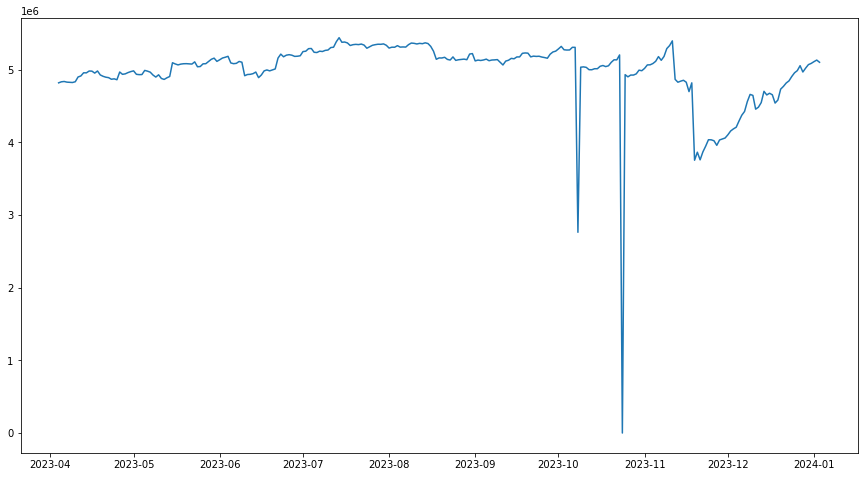

In [176]:
get_allasset()

In [11]:
def save_begin(ex, time_list, ls_trade, ls_ledger, ls_time):
    trade = get_trade(ex, ls_trade)
    ledger = get_ledger(ex, ls_ledger)
    begin_pos = read_dic(f'{ex}_begin')
    for num in ls_time:
        begin_pos[num] = get_begin(trade, ledger, time_list[num])
    save_dic(f'{ex}_begin', begin_pos)

In [119]:
save_begin('kraken_formal', time_list, [8], [8], ['7'])
#save_begin('kraken_test', [1,2,3], [1,4], time_list)

##  ib外汇

In [11]:
import tarfile

In [10]:
FX_ls = ['eur', 'chf', 'cad', 'paxg', 'gbp', 'aud']

In [41]:
#本地df和fp处理
def get_ibdf(ex):
    df = []
    for name in os.listdir(f'C:/Users/杜威/Desktop/tardis/profit/plot/pos/{ex}'):
        df_ = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/profit/plot/pos/{ex}/{name}')
        df.append(df_)
    df = pd.concat(df)
    df['time'] = df['time'].astype('datetime64[us]')
    df = df[df.coin1.isin(FX_ls) | df.coin2.isin(FX_ls)].reset_index(drop = True)
    return df.iloc[:, 1:]

def all_ibdf():
    formal = get_ibdf('kraken_formal')
    test = get_ibdf('kraken_test')
    df = pd.concat([formal, test]).sort_values('time').reset_index(drop = True)
    return df

In [15]:
def extrazip_ibfp(FX, begin, end, time_diff):
    filepath = f'D:/临时下载/ticks/ib_mongo_{FX}.tar.gz'
    fp = []
    with tarfile.open(filepath, 'r:gz') as tar:
        file_ls = tar.getnames()
        for file in file_ls:
            if ('/' not in file) or (file.split('/')[1][:8] > end) or (file.split('/')[1][:8] < begin):
                continue
            file_1 = tar.extractfile(f'{file}')
            fp_2 = pd.read_csv(file_1)
            fp.append(fp_2)
    fp = pd.concat(fp)
    f_gettime = lambda x: datetime.fromtimestamp((x) / 1000000) ##get datatime_type
    fp['time'] = fp.local_timestamp.map(f_gettime) + time_diff
    fp['mid'] = fp[['ask_price', 'bid_price']].mean(axis = 1)
    fp_2 = fp[['time', 'mid']].rename(columns = {'mid': FX}).sort_values('time').reset_index(drop = True)
    return fp_2

def get_ibfp(df, begin, end, time_diff, gap):
    for FX in FX_ls:
        fp_2 = extrazip_ibfp(FX, begin, end, time_diff)
        df.sort_values(by='time', inplace=True)
        fp_2.sort_values(by='time', inplace=True)
        df = pd.merge_asof(df, fp_2, on='time', direction='backward', tolerance = pd.Timedelta(5, 'min'))
    df[['time'] + FX_ls].to_csv(f'C:/Users/杜威/Desktop/tardis/profit/ib_fp/{gap}/ib_10.csv')
    
def get_ibgap(begin, end):
    for FX in FX_ls:
        fp_2 = extrazip_ibfp(FX, begin, end, timedelta(milliseconds=50))
        fp_2['time_diff'] = fp_2['time'].diff()
        fp_2['time_diff_1'] = fp_2['time_diff'].shift(-1)
        fp_2 = fp_2[~(fp_2['time_diff'] <= timedelta(minutes = 14)) | ~(fp_2['time_diff_1'] <= timedelta(minutes = 14))]
        df1 = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/profit/ib_gap/{FX}_0.csv', index_col=0)
        df1['time'] = df1['time'].astype('datetime64[ns]')
        df2 = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/profit/ib_gap/{FX}_1.csv', index_col=0)
        df2['time'] = df2['time'].astype('datetime64[ns]')
        df = pd.concat([df1, df2, fp_2])
        df = df.sort_values('time').reset_index(drop=True)
        df['time'] -= timedelta(milliseconds=50)
        df.to_csv(f'C:/Users/杜威/Desktop/tardis/profit/ib_gap/{FX}.csv')

In [19]:
begin = '20231001'
end = '20240103'

time_diff_ls = [timedelta(milliseconds=0),timedelta(milliseconds=100),timedelta(milliseconds=500),
                 timedelta(seconds=2),timedelta(seconds=10), timedelta(seconds=30),timedelta(minutes=1),
                 timedelta(minutes=5),timedelta(minutes=25),timedelta(hours=2),timedelta(hours=10)]
gap_ls = ['0ms', '100ms', '500ms', '2s', '10s', '30s', '1min', '5min', '25min', '2h', '10h']
for time_diff, gap in zip(time_diff_ls, gap_ls):
    get_ibfp(df, begin, end, time_diff, gap)
#get_ibgap(begin, end)

In [7]:
def load_ibfp(gap):
    fp = []
    for file in os.listdir(f'C:/Users/杜威/Desktop/tardis/profit/ib_fp/{gap}'):
        df = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/profit/ib_fp/{gap}/{file}')
        fp.append(df)
    fp = pd.concat(fp)
    fp['time'] = pd.to_datetime(fp['time'])
    fp = fp.sort_values(by='time').reset_index(drop = True)
    for col in pri_map:
        if col not in fp.columns:
            fp[col] = 1
    return fp.iloc[:, 1:].drop_duplicates().dropna()

In [139]:
fp = load_ibfp('50ms')

In [18]:
#计算ib上的净持仓亏损
def clean_pos(ex, df):
    df = df.dropna()
    df['fp1'] = df.apply(lambda x:x[x['coin1']], axis = 1)
    df['fp2'] = df.apply(lambda x:x[x['coin2']], axis = 1)
    df = df[['time', 'side','coin1', 'coin2', 'price', 'ch1', 'ch2',  'begin1', 'begin2', 'fp1', 'fp2']]
    balance = get_balance(ex)
    df = pd.merge_asof(df, balance, on='time', direction='backward')
    df['begin1'] = df.apply(lambda x:x['begin1'] - x[x['coin1']], axis = 1)
    df['begin2'] = df.apply(lambda x:x['begin2'] - x[x['coin2']], axis = 1)
    df = df[['time', 'coin1', 'coin2', 'price', 'ch1', 'ch2', 'begin1', 'begin2', 'fp1', 'fp2']]
    return df

def load_ibdf(ex, fp):
    df = get_ibdf(ex)
    df1 = pd.merge(df, fp, on = 'time', how = 'left')
    df2 = clean_pos(ex, df1)
    return df2

def split_df(coin, df):
    df1 = df[df['coin1'] == coin][['time', 'coin1', 'coin2', 'ch1', 'begin1', 'fp1']].rename(columns = 
                                                                                          {'coin2':'parten','coin1':'asset','ch1':'ch','begin1':'begin','fp1':'fp'})
    df2 = df[df['coin2'] == coin][['time', 'coin2', 'coin1', 'ch2', 'begin2', 'fp2']].rename(columns = 
                                                                                          {'coin1':'parten','coin2':'asset','ch2':'ch','begin2':'begin','fp2':'fp'})
    df_ = pd.concat([df1, df2]).sort_values('time')
    df_['pos'] = (df_['begin'] + df_['ch']).shift(1)
    df_['fp_diff'] = df_['fp'].diff() * df_['pos']
    df_['time_diff'] = df_['time'].diff()
    df_['FX_loss'] = (df_['time_diff'] <= timedelta(hours = 1)) * df_['fp_diff']
    return df_.reset_index(drop = True)

def show_out(fig, coin, dt2):
    dt2 = dt2[['time', 'FX_loss']].sort_values('time').fillna(0)
    cell = [coin]
    for col in ['FX_loss']:
        fig.add_trace(
            go.Scatter(
                x=dt2['time'],
                y=dt2[col].cumsum(),
                mode='lines',
                name=f'{coin}_{col}'
            )
        )
        cell.append(dt2[col].cumsum().values[-1])
    return cell, dt2[['time', 'FX_loss']]
        
def merge_df(df1, df2):
    df = pd.concat([df1, df2])
    return df[['time', 'FX_loss']].sort_values('time')
    
def plot_excel(fp, way = 'profit'):
    df1 = load_ibdf('kraken_formal', fp)
    df2 = load_ibdf('kraken_test', fp)
    layout = go.Layout(
        title='kraken FX loss',
        xaxis=dict(title='time'),
        yaxis=dict(title='dollar')
        )
    fig = go.Figure(layout=layout)
    ls = []
    bid = 0
    for coin in FX_ls:
        dt3 = []
        dt31 = split_df(coin, df1)
        dt32 = split_df(coin, df2)
        dt3 = pd.concat([dt31, dt32])
        if len(dt3) == 0:
            continue
        cell, dt3 = show_out(fig, coin, dt3)
        if bid == 0:
            df_all = dt3
        else:
            df_all = merge_df(df_all, dt3)
        bid += 1
        ls.append(cell)
    if way == 'sharpe':
        return df_all
    cell, dt_all = show_out(fig, 'all', df_all)
    ls.append(cell)
    path = f'C:/Users/杜威/Desktop/tardis/profit/plot/fig'
    os.chdir(path)
    plotly.offline.plot(fig, filename=f'kraken_FX.html', auto_open=False)
    df = pd.DataFrame(ls, columns = ['coin', 'FX_loss'])
    df2 = pd.read_csv(r'C:\Users\杜威\Desktop\tardis\profit\plot\fig\final.csv')
    df = pd.merge(df, df2[['coin', 'fp_diff']], on = 'coin', how = 'left')
    df.to_csv(f'{path}/FX.csv')

In [162]:
plot_excel(fp)

In [63]:
#计算交易量随时间的亏损
def merge_ibtime(df, gap):
    fp = load_ibfp(gap)
    df = pd.merge(df, fp, on = 'time', how = 'left')
    df = df.dropna()
    df['fp1'] = df.apply(lambda x:x[x['coin1']], axis = 1)
    df['fp2'] = df.apply(lambda x:x[x['coin2']], axis = 1)
    df = df[['time','coin1', 'coin2','ch1', 'ch2','fp1', 'fp2']]
    return df

def split_coin(coin, df):
    df1 = df[df['coin1'] == coin][['time', 'coin1', 'ch1', 'fp1']].rename(columns = 
                                                                {'coin1':'asset','ch1':'ch','fp1':'fp'})
    df2 = df[df['coin2'] == coin][['time', 'coin2', 'ch2', 'fp2']].rename(columns = 
                                                                {'coin2':'asset','ch2':'ch','fp2':'fp'})
    df_ = pd.concat([df1, df2]).sort_values('time')
    return df_

def call_ibdiff(coin, dft, tt):
    dft = split_coin(coin, dft)
    tt = split_coin(coin, tt)
    df = pd.merge(dft, tt, on = ['time', 'asset', 'ch'], how = 'left')
    df['fp_diff'] = (df['fp_x'] - df['fp_y']) * df['ch']
    return np.sum(df['fp_diff'])

def sum_ibdiff(dft, tt, gap):
    coin_ls = ['eur', 'chf', 'cad', 'paxg', 'gbp', 'aud']
    diff_ls = []
    for coin in coin_ls:
        diff_ls.append(call_ibdiff(coin, dft, tt))
    coin_ls.append('all')
    diff_ls.append(sum(diff_ls))
    df = pd.DataFrame(diff_ls, coin_ls).reset_index().rename(columns = {'index': 'coin', 0: gap})
    return df

def final_ibdiff(gap_ls):
    df = all_ibdf()
    dft = merge_ibtime(df, '50ms')
    df_ = sum_ibdiff(dft, dft, '50ms')
    for gap in gap_ls:
        tt = merge_ibtime(df, gap)
        _df = sum_ibdiff(dft, tt, gap)
        df_ = pd.merge(df_, _df, on = 'coin')
    return df_

In [64]:
gap_ls = ['0ms', '100ms', '500ms', '2s', '10s', '30s', '1min', '5min', '25min', '2h', '10h']

In [65]:
df = final_ibdiff(gap_ls)

In [91]:
    layout = go.Layout(
        title='kraken time_diff',
        xaxis=dict(title='time'),
        yaxis=dict(title='dollar')
        )
    fig = go.Figure(layout=layout)
    for i in range(7):
        fig.add_trace(
            go.Scatter(
                x=df.columns[1:],
                y=df.iloc[i:i+1, 1:].values.reshape(-1),
                mode='lines',
                name=df['coin'][i]
            )
        )
    path = f'C:/Users/杜威/Desktop/tardis/profit/plot/fig'
    os.chdir(path)
    plotly.offline.plot(fig, filename=f'kraken_timediff.html', auto_open=False)

'kraken_timediff.html'

In [90]:
df = df.reindex(['coin', '0ms', '50ms', '100ms', '500ms', '2s', '10s', '30s', '1min', '5min', '25min', '2h', '10h'], axis=1)

In [92]:
df.to_csv(f'{path}/timediff.csv')

In [178]:
#计算收盘时的跳跃损失
def clean_FXdf(ex):
    df = get_ibdf('kraken_formal').dropna()
    balance = get_balance(ex)
    df = pd.merge_asof(df, balance, on='time', direction='backward')
    df['begin1'] = df.apply(lambda x:x['begin1'] - x[x['coin1']], axis = 1)
    df['begin2'] = df.apply(lambda x:x['begin2'] - x[x['coin2']], axis = 1)
    df = df[['time', 'coin1', 'coin2', 'price', 'ch1', 'ch2', 'begin1', 'begin2']]
    return df

def get_FXgap(ex, FX, df):
    fp = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/profit/ib_gap/{FX}.csv', index_col=0)
    fp['time'] = fp['time'].astype('datetime64[ns]')
    fp['time_diff_2'] = fp['time'].diff()
    fp['time_diff'] = fp['time_diff'].fillna(fp['time_diff_2']).astype('str')
    fp['time_diff_1'] = fp['time_diff'].shift(-1)
    fp = fp[(fp['time_diff'] >= '0 days 00:14:00') | (fp['time_diff_1'] >= '0 days 00:14:00')].dropna()
    
    df1 = df[df['coin1'] == FX][['time', 'coin1', 'ch1', 'begin1']].rename(columns = 
                                                        {'coin1':'asset','ch1':'ch','begin1':'begin'})
    df2 = df[df['coin2'] == FX][['time', 'coin2', 'ch2', 'begin2']].rename(columns = 
                                                        {'coin2':'asset','ch2':'ch','begin2':'begin'})
    df_ = pd.concat([df1, df2]).sort_values('time')
    df_['pos'] = (df_['begin'] + df_['ch']).shift(1)
    
    df_ = pd.merge_asof(fp[['time', FX, 'time_diff']], df_[['time', 'pos']], on='time', direction='backward')
    df_['FX_gap'] = df_['pos'].shift(0) * df_[FX].diff() * (df_['time_diff'] >= '0 days 00:14:00')
    return df_
    
def add_FXgap(fig, dt_, FX):
    fig.add_trace(
        go.Scatter(
            x=dt_['time'],
            y=dt_['FX_gap'].cumsum(),
            mode='lines',
            name=f'{FX}'
        )
    )
    
def plot_FXgap(ex):
    layout = go.Layout(
        title='kraken FX Gap',
        xaxis=dict(title='time'),
        yaxis=dict(title='dollar')
        )
    fig = go.Figure(layout=layout)
    bid = 0
    ls = []
    
    df = clean_FXdf(ex)
    for FX in FX_ls:
        df_ = get_FXgap(ex, FX, df)
        add_FXgap(fig, df_, FX)
        if bid == 0:
            df_all = df_
        else:
            df_all = pd.concat([df_all, df_])
            df_all = df_all[['time', 'FX_gap']].sort_values('time')
        bid += 1
        ls.append([FX, df_['FX_gap'].cumsum().values[-1]])
    add_FXgap(fig, df_all, 'All')
    ls.append(['All', df_all['FX_gap'].cumsum().values[-1]])
    path = f'C:/Users/杜威/Desktop/tardis/profit/plot/fig'
    os.chdir(path)
    plotly.offline.plot(fig, filename=f'kraken_FXGap.html', auto_open=False)
    df = pd.DataFrame(ls, columns = ['coin', 'FX_gap'])
    df.to_csv(f'{path}/FX_Gap.csv')

In [179]:
plot_FXgap('kraken_formal')

# 旧方法

## 开仓平仓配对

In [10]:
balance_map = read_dic('balance')
time_ls = read_dic('time')
kk_fm_begin = read_dic('kraken_formal_begin')
kk_tt_begin = read_dic('kraken_test_begin')

In [11]:
def into_trade(df,balance,begin_dic,time_part):
    rows = df.columns
    begin = copy.deepcopy(begin_dic)
    fp_map = {}
    p = 0
    for t in rows:
        fp_map[t] = p
        p += 1
    df = df[(df['time']>=time_part[0]) & (df['time']<=time_part[1])]
    arr = df.to_numpy()
    trade_records = np.empty((len(arr), 15), dtype=object)
    for i in range(0, len(arr)):
        if arr[i][1][-4:] in ['usdt','usdc']:
            coin1,coin2 = arr[i][1][:-4],arr[i][1][-4:]
        else:
            coin1,coin2 = arr[i][1][:-3],arr[i][1][-3:]
            
        amount,value = arr[i][4],arr[i][5]
        price = arr[i][3] 
        fprice1 = arr[i][fp_map[coin1]]
        fprice2 = arr[i][fp_map[coin2]]
        
        if arr[i][2] == 'buy':
            buy_coin,sell_coin = coin1,coin2
            buy_num,sell_num = 1,2
            buy_amount,sell_amount = amount,value*-1
            margin = fprice1 - price * fprice2
        else:
            buy_coin,sell_coin = coin2,coin1
            buy_num,sell_num = 2,1
            buy_amount,sell_amount = value,amount*-1
            margin = price * fprice2 - fprice1
            
        buy_fp = arr[i][fp_map[buy_coin]]
        sell_fp = arr[i][fp_map[sell_coin]]
        
        buy_pos_begin = begin[buy_coin] - balance[buy_coin]
        sell_pos_begin = begin[sell_coin] - balance[sell_coin]
        begin[buy_coin] += buy_amount
        begin[sell_coin] += sell_amount
        buy_pos_end = begin[buy_coin] - balance[buy_coin]
        sell_pos_end = begin[sell_coin] - balance[sell_coin]

        trade_record = np.array([arr[i][0],buy_coin,buy_amount,buy_fp,buy_pos_begin,buy_pos_end,
                                 sell_coin,sell_amount,sell_fp,sell_pos_begin,sell_pos_end,margin,buy_num,sell_num,price])
        trade_records[i] = trade_record

    columns = ['time', 'buy_coin', 'buy_amount','buy_fp','buy_pos_begin','buy_pos_end',
               'sell_coin', 'sell_amount', 'sell_fp','sell_pos_begin','sell_pos_end','margin','buy_num','sell_num','price']
    trade_records_df = pd.DataFrame(trade_records, columns=columns)
    return trade_records_df

In [12]:
def coin_df(trade_df,coin):
    dt = trade_df[(trade_df['buy_coin'] == coin) | (trade_df['sell_coin'] == coin)]
    if dt.empty:
        return dt
    dt = dt.reset_index().drop("index", axis=1)
    dt.loc[dt['buy_coin'] == coin, 'begin'] = dt.loc[dt['buy_coin'] == coin, 'buy_pos_begin']
    dt.loc[dt['buy_coin'] == coin, 'end'] = dt.loc[dt['buy_coin'] == coin, 'buy_pos_end']
    dt.loc[dt['sell_coin'] == coin, 'begin'] = dt.loc[dt['sell_coin'] == coin, 'sell_pos_begin']
    dt.loc[dt['sell_coin'] == coin, 'end'] = dt.loc[dt['sell_coin'] == coin, 'sell_pos_end']
    dt.loc[dt['buy_coin'] == coin, 'fp'] = dt.loc[dt['buy_coin'] == coin, 'buy_fp']
    dt.loc[dt['sell_coin'] == coin, 'fp'] = dt.loc[dt['sell_coin'] == coin, 'sell_fp']
    dt['index'] = dt['begin'] * dt['end']
    dt1 = dt.sort_values('time')
    begin = dt1[dt1['index'] <= 0]['time'].values[0]
    dt1 = dt.sort_values('time',ascending = False)
    end = dt1[dt1['index'] <= 0]['time'].values[0]
    dt = dt[dt['time'] >= begin][dt['time'] <= end].reset_index()
    return dt.iloc[:,1:]

In [13]:
# 先进先出
def get_pos1_0(dt,balance,coin,fp):
    dt['begin'] = dt['begin'] / balance + 1
    dt['end'] = dt['end'] / balance + 1
    arr = dt.to_numpy()
    begin = 0
    buy_list=[]
    sell_list=[]
    records = np.empty((len(arr)*2, 14), dtype=object)
    k = 0
    for i in list(dt.index):
        row = arr[i]
    
        #仓位平衡时开始计算
        if (row[15]-1)*(row[16]-1) > 0 and begin == 0:
            continue
    
        #入栈
        if (row[15]-1)*(row[16]-1) < 0:
            if row[1] == coin:
                amount_plus = (row[16]-1)/(row[16]-row[15])*row[2]
                if begin == 1:
                    amount_plus = row[2]
                arr[i][15] = 1
                buy_list.append([i,amount_plus])
            else:
                amount_plus = (1-row[16])/(row[15]-row[16])*row[7]
                if begin ==1 :
                    amount_plus = row[7]
                arr[i][15] = 1
                sell_list.append([i,abs(amount_plus)])
            begin = 1
        else:
            if row[1] == coin:
                buy_list.append([i,row[2]])
            else:
                sell_list.append([i,abs(row[7])])
    
        #出栈
        while buy_list and sell_list:
            buy_site = buy_list[0][0]
            sell_site = sell_list[0][0]
            buy_row = arr[buy_site]
            sell_row = arr[sell_site]
            amount = min(buy_list[0][1],sell_list[0][1])
            buy_amount = amount
            sell_amount = amount
            if buy_row[12] == 2:
                buy_amount = amount / buy_row[14]
            if sell_row[13] == 2:
                sell_amount = amount / sell_row[14]
            if buy_list[0][1] > sell_list[0][1]:
                buy_list[0][1] = buy_list[0][1] - sell_list[0][1]
                sell_list = sell_list[1:]
            elif buy_list[0][1] < sell_list[0][1]:
                sell_list[0][1] = sell_list[0][1] - buy_list[0][1]
                buy_list = buy_list[1:]
            else:
                sell_list = sell_list[1:]
                buy_list = buy_list[1:]
            if buy_row[0] > sell_row[0]:
                pos_high = min(sell_row[15],buy_row[16])
                pos_low = pos_high - amount/balance
                open_profit = abs(sell_amount) * sell_row[11] 
                close_profit = abs(buy_amount) * buy_row[11] 
                amount = -1*amount
                open_coin,open_time,open_margin,close_coin,close_time,close_margin = sell_row[1],sell_row[0],sell_row[11],buy_row[6],buy_row[0],buy_row[11]
            else:
                pos_low = max(sell_row[16],buy_row[15])
                pos_high = pos_low + amount/balance
                open_profit = abs(buy_amount) * buy_row[11]
                close_profit = abs(sell_amount) * sell_row[11]
                open_coin,open_time,open_margin,close_coin,close_time,close_margin = buy_row[6],buy_row[0],buy_row[11],sell_row[1],sell_row[0],sell_row[11]
            
            fp_diff_profit = abs(amount) * (sell_row[17] - buy_row[17])
            fp_diff = sell_row[17] - buy_row[17]
            dv = amount * (sell_row[17] + buy_row[17]) / 2
            record = np.array([coin,dv,pos_low,pos_high,
                               open_coin,open_time,open_margin,open_profit,
                               close_coin,close_time,close_margin,close_profit,
                               fp_diff,fp_diff_profit])
            records[k] = record
            k = k+1
                
    columns = ['asset', 'dallor_value', 'pos_low','pos_high',
               'open_coin', 'open_time','open_margin','open_profit',
               'close_coin', 'close_time','close_margin','close_profit',
               'fp_diff','fp_diff_profit']
    records_df = pd.DataFrame(records, columns=columns)
    return records_df.sort_values(['open_time', 'close_time'],ascending = [True, False])

In [14]:
# 先进后出
def get_pos1(dt,balance,coin,fp):
    dt['begin'] = dt['begin'] / balance + 1
    dt['end'] = dt['end'] / balance + 1
    arr = dt.to_numpy()
    end = dt[-1:].values[0][0]
    rp1 = fp[fp['time']<=end]
    rp = rp1[-1:]
    rp['usd'] = 1
    begin = 0
    buy_list=[]
    sell_list=[]
    records = np.empty((len(arr)*2, 14), dtype=object)
    k = 0
    for i in list(dt.index):
        row = arr[i]
    
        #仓位平衡时开始计算
        if (row[15]-1)*(row[16]-1) > 0 and begin == 0:
            continue
    
        #入栈
        if (row[15]-1)*(row[16]-1) < 0:
            if row[1] == coin:
                amount_plus = (row[16]-1)/(row[16]-row[15])*row[2]
                if begin == 1:
                    amount_plus = row[2]
                arr[i][15] = 1
                buy_list.append([i,amount_plus])
            else:
                amount_plus = (1-row[16])/(row[15]-row[16])*row[7]
                if begin ==1 :
                    amount_plus = row[7]
                arr[i][15] = 1
                sell_list.append([i,abs(amount_plus)])
            begin = 1
        else:
            if row[1] == coin:
                buy_list.append([i,row[2]])
            else:
                sell_list.append([i,abs(row[7])])
    
        #出栈
        while buy_list and sell_list:
            buy_site = buy_list[-1][0]
            sell_site = sell_list[-1][0]
            buy_row = arr[buy_site]
            sell_row = arr[sell_site]
            amount = min(buy_list[-1][1],sell_list[-1][1])
            buy_amount = amount
            sell_amount = amount
            if buy_row[12] == 2:
                buy_amount = amount / buy_row[14]
            if sell_row[13] == 2:
                sell_amount = amount / sell_row[14]
            if buy_list[-1][1]>sell_list[-1][1]:
                buy_list[-1][1] = buy_list[-1][1] - sell_list[-1][1]
                sell_list = sell_list[:-1]
            elif buy_list[-1][1]<sell_list[-1][1]:
                sell_list[-1][1] = sell_list[-1][1] - buy_list[-1][1]
                buy_list = buy_list[:-1]
            else:
                sell_list = sell_list[:-1]
                buy_list = buy_list[:-1]
            if buy_row[0]>sell_row[0]:
                pos_high = min(sell_row[15],buy_row[16])
                pos_low = pos_high - amount/balance
                open_profit = abs(sell_amount) * sell_row[11] 
                close_profit = abs(buy_amount) * buy_row[11] 
                amount = -1*amount
                open_coin,open_time,open_margin,close_coin,close_time,close_margin = sell_row[1],sell_row[0],sell_row[11],buy_row[6],buy_row[0],buy_row[11]
            else:
                pos_low = max(sell_row[16],buy_row[15])
                pos_high = pos_low + amount/balance
                open_profit = abs(buy_amount) * buy_row[11]
                close_profit = abs(sell_amount) * sell_row[11]
                open_coin,open_time,open_margin,close_coin,close_time,close_margin = buy_row[6],buy_row[0],buy_row[11],sell_row[1],sell_row[0],sell_row[11]
            
            fp_diff_profit = abs(amount) * (sell_row[8] - buy_row[3])
            fp_diff = sell_row[8] - buy_row[3]
            dv = amount * (sell_row[8] + buy_row[3]) / 2
            record = np.array([coin,dv,pos_low,pos_high,
                               open_coin,open_time,open_margin,open_profit,
                               close_coin,close_time,close_margin,close_profit,
                               fp_diff,fp_diff_profit])
            records[k] = record
            k = k+1
                
    columns = ['asset', 'dallor_value', 'pos_low','pos_high',
               'open_coin', 'open_time','open_margin','open_profit',
               'close_coin', 'close_time','close_margin','close_profit',
               'fp_diff','fp_diff_profit']
    records_df = pd.DataFrame(records, columns=columns)
    return records_df.dropna(axis=0,how='all').sort_values(['open_time', 'close_time'],ascending = [True, False])

In [15]:
def partern_con(ex, part, begin, num, way, trade_ls, fp_ls):
    for file in ['仓位变动', way]:
        path = f'C:/Users/杜威/Desktop/tardis/profit/{file}/{ex}/{num}'
        if not os.path.exists(path):
            os.mkdir(path)
    func = func_dic[way]
    trade = get_trade(ex, trade_ls)
    fp = get_fp(fp_num)
    trade = trade[(trade['time'] >= time_list[part][0]) & (trade['time'] <= time_list[part][1])]
    df = pd.merge(trade, fp, on = 'time', how = 'left').ffill()
    pos_begin = read_dic(f'{ex}_begin')
    trade = into_trade(df, balance_map[part][ex], pos_begin[part], time_ls[part])
    trade = trade[trade['time'] >= begin]
    trade = trade.dropna()
    for coin in balance_map[part]['kraken_formal']:
        df = coin_df(trade,coin)
        if df.empty:
            print(f'{coin} is error!')
            continue
        dt = df[:]
        dt['asset'] = coin
        dt['pos'] = dt['begin']
        dt = dt[['asset','time','pos','fp']]
        dt.to_csv(f'C:/Users/杜威/Desktop/tardis/profit/仓位变动/{ex}/{num}/{coin}.csv')
        df_pos = func(df,balance_map[part]['kraken_formal'][coin],coin,fp)
        df_pos.to_csv(f'C:/Users/杜威/Desktop/tardis/profit/{way}/{ex}/{num}/{coin}.csv')

In [72]:
func_dic = {
    '先进先出':get_pos1_0,
    '先进后出':get_pos1
}
for ex in ['kraken_formal','kraken_test'][:1]:
    for time_part in ['7']:
        file_num = int(time_part) + 2
        partern_con(ex, time_part, '2023-11-15', file_num, '先进先出', [8], [8])

dai is error!


##  币种统计

In [6]:
def get_pos2(ex, part, coin, way):
    asset_num = pri_map[coin]
    df = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/profit/{way}/{ex}/{part}/{coin}.csv').dropna()
    df['open_time'] = pd.to_datetime(df['open_time'])
    df['close_time'] = pd.to_datetime(df['close_time'])

    df['open_pos'] = df[['pos_low','pos_high']].mean(axis=1)
    df['time_diff'] = df['close_time'] - df['open_time']
    df['time_diff'] = df['time_diff'].map(lambda x:x.total_seconds())
    df['hold_time'] = abs(df['dallor_value']) * df['time_diff']
    ch_fun = lambda x:1 if asset_num < pri_map[x] else 0
    df['open_num'] = df['open_coin'].map(ch_fun)
    df['close_num'] = df['close_coin'].map(ch_fun)
    df['margin_profit'] = df['open_profit'] * df['open_num'] + df['close_profit'] * df['close_num'] 
    df['dallor_value2'] = (df['open_num'] + df['close_num']) * df['dallor_value']
    df = df[['fp_diff','dallor_value2','open_coin','close_coin','open_pos','time_diff','margin_profit','fp_diff_profit','hold_time','dallor_value']]
    return df

In [24]:
def pri_map():
    priority = ['ltc','xrp','ada','xdg','link','matic','sol', 'dot' ,'eth', 'btc','paxg' ,'aud', 'cad', 'chf', 'gbp', 'eur' ,'dai', 'usdt', 'usdc', 'usd']
    pri_map = {}
    num = 0
    for coin in priority:
        pri_map[coin] = num
        num += 1
    return pri_map
pri_map = pri_map()

In [8]:
def get_coin1(ex, part, way):
    import datetime
    gettime = lambda x:datetime.timedelta(seconds = x)
    records = np.empty((20, 7), dtype=object)
    profit_all = 0
    rp_map = {}
    margin_all = 0
    rp_profit_all = 0
    hold_time_all = 0
    dv_all = 0
    k = 0
    ls = os.listdir(f'C:/Users/杜威/Desktop/tardis/profit/{way}/{ex}/{part}')
    for coin in priority:
        if f'{coin}.csv' not in ls:
            continue
        coin1 = get_pos2(ex, part, coin, way).dropna()
        margin_profit = np.sum(coin1['margin_profit'])
        rp_profit = np.sum(coin1['fp_diff_profit'])
        hold_time = np.sum(coin1['hold_time'])
        dv = np.sum(abs(coin1['dallor_value']))
        dv2 = np.sum(abs(coin1['dallor_value2']))
        hold_time_mean = hold_time / dv
        margin = margin_profit / dv2
        profit = rp_profit + margin_profit
        profit_all += profit
        margin_all += margin_profit
        rp_profit_all += rp_profit
        hold_time_all += hold_time
        dv_all += dv2
        record = np.array([coin,int(profit),int(margin_profit),int(rp_profit),gettime(hold_time_mean),dv2,margin])
        records[k] = record
        k += 1
    hold_time_mean = hold_time_all / dv_all
    margin = margin_all / dv_all
    record = np.array(['all',int(profit_all),int(margin_all),int(rp_profit_all),gettime(hold_time_mean),dv_all,margin])
    records[k] = record
    columns = ['asset','profit_all','margin_profit','rp_diff_profit','hold_time','dallor_value','margin_rate']
    records_df = pd.DataFrame(records, columns=columns)
    records_df.dropna().to_csv(f'C:/Users/杜威/Desktop/tardis/profit/fp统计/币种/{ex}_{part}_{way}.csv')

In [76]:
for ex in ['kraken_formal','kraken_test'][:1]:
    for part in ['9']:
        get_coin1(ex, part,'先进先出')

## 持仓时间统计

In [9]:
def time_pos(way, ex, part, coin):
    df = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/profit/{way}/{ex}/{part}/{coin}')
    df['open_time'] = pd.to_datetime(df['open_time'])
    df['close_time'] = pd.to_datetime(df['close_time'])

    df['open_pos'] = df[['pos_low','pos_high']].mean(axis=1)
    df['time_diff'] = df['close_time'] - df['open_time']
    df['time_diff'] = df['time_diff'].map(lambda x:x.total_seconds())
    df['dallor_value'] = abs(df['dallor_value'])
    
    df = df[['time_diff','dallor_value']]
    return df

In [10]:
def weighted_quantile(df, value_col, weight_col, quantiles):
    sorted_df = df.sort_values(by=value_col)
    sorted_df['cumulative_weight'] = sorted_df[weight_col].cumsum()
    total_weight = sorted_df[weight_col].sum()

    quantile_results = []
    for quantile in quantiles:
        target_weight = quantile * total_weight
        result = np.interp(target_weight, sorted_df['cumulative_weight'], sorted_df[value_col])
        quantile_results.append(result)
    sorted_df.drop(columns=['cumulative_weight'], inplace=True)
    
    import datetime
    gettime = lambda x:datetime.timedelta(seconds = x)

    return pd.Series(quantile_results, index=quantiles).map(gettime)

In [11]:
def get_percent_time(ex, way, part):
    df_ls = []
    name_ls = []
    for coin in os.listdir(f'C:/Users/杜威/Desktop/tardis/profit/{way}/{ex}/{part}'):
        coin1 = time_pos(way, ex, part, coin).dropna()
        t1 = weighted_quantile(coin1,'time_diff','dallor_value',np.arange(0,1.05,0.05))
        df_ls.append(t1)
        name_ls.append(coin[:-4])
    dt = pd.concat(df_ls,axis = 1,keys = name_ls)
    dt.to_csv(f'C:/Users/杜威/Desktop/tardis/profit/fp统计/持仓统计/{ex}_{way}_{part}.csv')
    return dt

In [13]:
for ex in ['kraken_formal','kraken_test'][:1]:
    for part in ['9']:
        get_percent_time(ex, '先进先出', part)

## 币对统计

In [60]:
def get_all_coin(ex, part, dt0):
    df = []
    for file in os.listdir(f'C:/Users/杜威/Desktop/tardis/profit/先进先出/{ex}/{part}'):
        dt = pd.read_csv(f'C:/Users/杜威/Desktop/tardis/profit/先进先出/{ex}/{part}/{file}').dropna()
        df.append(dt)
    df = pd.concat(df)
    coin_all = df.iloc[:,1:]
    coin_list = list(dt0.groupby('pair',as_index = False).sum()['pair'])
    arr2 = coin_all.to_numpy()
    coin1 = []
    coin2 = []
    for i in range(len(arr2)):
        if arr2[i][0] + arr2[i][4] in coin_list:
            coin1.append(arr2[i][0] + arr2[i][4])
        elif arr2[i][4] + arr2[i][0] in coin_list:
            coin1.append(arr2[i][4] + arr2[i][0])
        else:
            print(arr2[i][4] , arr2[i][0])
        if arr2[i][0] + arr2[i][8] in coin_list:
            coin2.append(arr2[i][0] + arr2[i][8])
        elif arr2[i][8] + arr2[i][0] in coin_list:
            coin2.append(arr2[i][8] + arr2[i][0])
        else:
            print(arr2[i][8] , arr2[i][0])
    coin_all['coin1'] = coin1
    coin_all['coin2'] = coin2
    return coin_all

In [14]:
def get_merge_fp(ex, part, begin):
    trade = get_trade(ex, [8])
    fp = get_fp()
    trade = trade[(trade['time'] >= begin) & (trade['time'] <= time_ls[part][1]) & (trade['time'] >= time_ls[part][0])]
    df = pd.merge(trade, fp, on = 'time', how = 'left')
    return df

In [15]:
def cal_margin(df):
    rows = df.columns
    coin_map = {}
    p = 0
    for t in rows:
        coin_map[t] = p
        p += 1
    data = df.values

    for i in range(len(data)):
        if data[i][1][-4:] in ['usdt','usdc']:
            coin1,coin2 = data[i][1][:-4],data[i][1][-4:]
        else:
            coin1,coin2 = data[i][1][:-3],data[i][1][-3:]
        fair_price = data[i][coin_map[coin1]] / data[i][coin_map[coin2]]
        if data[i][2] == 'buy':
            data[i][3] = 1 - data[i][3] / fair_price
        elif data[i][2] == 'sell':
            data[i][3] = data[i][3] / fair_price - 1
        data[i][5] = data[i][4] * data[i][coin_map[coin1]]
        data[i][4] = data[i][5] * data[i][3]
    
    df = pd.DataFrame(data, columns=rows)
    df.rename(columns={'price': 'margin', 'amount': 'profit','value':'dallor_value'}, inplace=True)
    return df[['pair','dallor_value','margin','profit']]

In [16]:
def ch_coin_all(df,dt):
    df['dallor_value'] = abs(df['dallor_value'])
    df = df[['coin1','fp_diff_profit']].groupby('coin1',as_index = False).sum()
    df.rename(columns = {'coin1':'pair'}, inplace=True)
    dt = dt.groupby('pair',as_index = False).sum()
    dt.rename(columns = {'profit':'margin_profit'}, inplace=True)
    df = pd.merge(dt,df,on = 'pair',how = 'outer')
    df['margin_rate'] = df['margin_profit'] / df['dallor_value']
    df['profit_all'] = df['margin_profit'] + df['fp_diff_profit']
    profit = df['profit_all'].sum()
    margin = df['margin_profit'].sum()
    fp_diff = df['fp_diff_profit'].sum()
    amount = df['dallor_value'].sum()
    rate = margin/amount
    all_ = np.array(['all',profit,margin,fp_diff,amount,rate])
    df = df[['pair','profit_all','margin_profit','fp_diff_profit','dallor_value','margin_rate']]
    df.loc[-1] = all_  # adding a row
    df.index = df.index + 1  # shifting index
    df = df.sort_index() 
    return df[['pair','profit_all','margin_profit','fp_diff_profit','dallor_value','margin_rate']]

In [17]:
def get_doubcoin(ex, coin_part, time_part, begin):
    df = get_merge_fp(ex, time_part, begin)
    coin_all = get_all_coin(ex, coin_part, df)
    dt = cal_margin(df)
    coin3_all = ch_coin_all(coin_all,dt)
    coin3_all.iloc[:,1:5] = coin3_all.iloc[:,1:5].applymap(lambda x: round(float(x),2) )
    coin3_all.to_csv(f'C:/Users/杜威/Desktop/tardis/profit/fp统计/币对/{ex}_{coin_part}.csv')

In [45]:
for ex in ['kraken_formal','kraken_test'][:1]:
    get_doubcoin(ex, '9', '7', '2023-11-15')

NameError: name 'get_doubcoin' is not defined

# 价差分析呈现

In [77]:
df = pd.read_csv(r'C:\Users\杜威\Desktop\20231101-20231106.csv', index_col = 0)
df['online'] = df[df.columns[2]]

In [78]:
for col in df.columns[1:]:
    df[col] = df[col] - df['online']

In [80]:
def transfer(date):
    now = datetime.now()  
    try:
        date_time_obj = datetime.combine(now.date(), datetime.strptime(date, "%H:%M:%S").time())  
        return date_time_obj 
    except:
        date_time_obj = datetime.combine(now.date(), datetime.strptime(date, "%H:%M:%S.%f").time())  
        return date_time_obj 

In [87]:
    layout = go.Layout(
        title='kraken time_diff',
        xaxis=dict(title='time'),
        yaxis=dict(title='dollar')
        )
    fig = go.Figure(layout=layout)
    for coin in df['asset']:
        fig.add_trace(
            go.Scatter(
                x=[transfer(i) for i in df.columns[1:-11]],
                y=df.loc[df['asset'] == coin, :].values[0][1:-11],
                mode='lines',
                name=coin
            )
        )
    fig.add_trace(
            go.Scatter(
                x=[transfer(i) for i in df.columns[1:-11]],
                y=df.sum()[1:-11],
                mode='lines',
                name='all'
            )
        )
    path = f'C:/Users/杜威/Desktop/tardis/profit/plot/fig'
    os.chdir(path)
    plotly.offline.plot(fig, filename=f'kraken_timediff.html', auto_open=False)

'kraken_timediff.html'